In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup works! ✅")


Setup works! ✅


In [3]:
df = pd.read_csv('../data/online_retail_ii.csv', parse_dates=['InvoiceDate'])

# quick check
print(df.shape)   # rows, cols
df.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.info()
df.describe()
df.isnull().sum()   
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [7]:
#duplicates
print("Before:", df.shape)
df = df.drop_duplicates()
print("After:", df.shape)


Before: (1067371, 8)
After: (1033036, 8)


In [11]:
#missing values
df = df.dropna(subset=['InvoiceDate', 'Price', 'Description'])

In [9]:
print(df.columns.tolist())

['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


In [12]:
#andle cancellations / returns
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [13]:
# Keep only positive quantity & price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [14]:
# Create a total sales column
df['total_price'] = df['Quantity'] * df['Price']

In [15]:
print("Rows, Cols:", df.shape)
df.head()


Rows, Cols: (1007913, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [16]:
total_revenue = df['total_price'].sum()

In [18]:
total_orders =df['Invoice'].nunique()

In [19]:
total_customers = df['Customer ID'].nunique()

In [20]:
avg_order_value = total_revenue / total_orders

In [21]:
print(" Total Revenue:", round(total_revenue, 2))
print(" Total Orders:", total_orders)
print(" Total Customers:", total_customers)
print(" Average Order Value:", round(avg_order_value, 2))

 Total Revenue: 20476260.45
 Total Orders: 40077
 Total Customers: 5878
 Average Order Value: 510.92


In [24]:
# Create date-based features
df['order_date'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['order_month'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M').dt.to_timestamp()
df['order_year'] = pd.to_datetime(df['InvoiceDate']).dt.year


In [25]:
monthly_sales = df.groupby('order_month')['total_price'].sum().reset_index()

monthly_sales.head()


,order_month,total_price
0,2009-12-01,822483.950
1,2010-01-01,651155.112
2,2010-02-01,551504.726
3,2010-03-01,830915.261
4,2010-04-01,678875.252


In [26]:
top_products=(
    df.groupby('Description')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

Description
Manual                                339241.29
REGENCY CAKESTAND 3 TIER              330590.32
DOTCOM POSTAGE                        309854.11
WHITE HANGING HEART T-LIGHT HOLDER    260990.22
PAPER CRAFT , LITTLE BIRDIE           168469.60
PARTY BUNTING                         148318.28
JUMBO BAG RED RETROSPOT               148073.47
ASSORTED COLOUR BIRD ORNAMENT         129324.49
POSTAGE                               125682.42
PAPER CHAIN KIT 50'S CHRISTMAS        117760.29
Name: total_price, dtype: float64

In [28]:
top_countries = (
    df[df['Country'] != 'United Kingdom']
    .groupby('Country')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_countries

Country
EIRE           658767.310
Netherlands    554038.090
Germany        425019.711
France         350456.090
Australia      169283.460
Spain          108332.490
Switzerland    100685.590
Sweden          91869.820
Denmark         68580.690
Belgium         65387.820
Name: total_price, dtype: float64

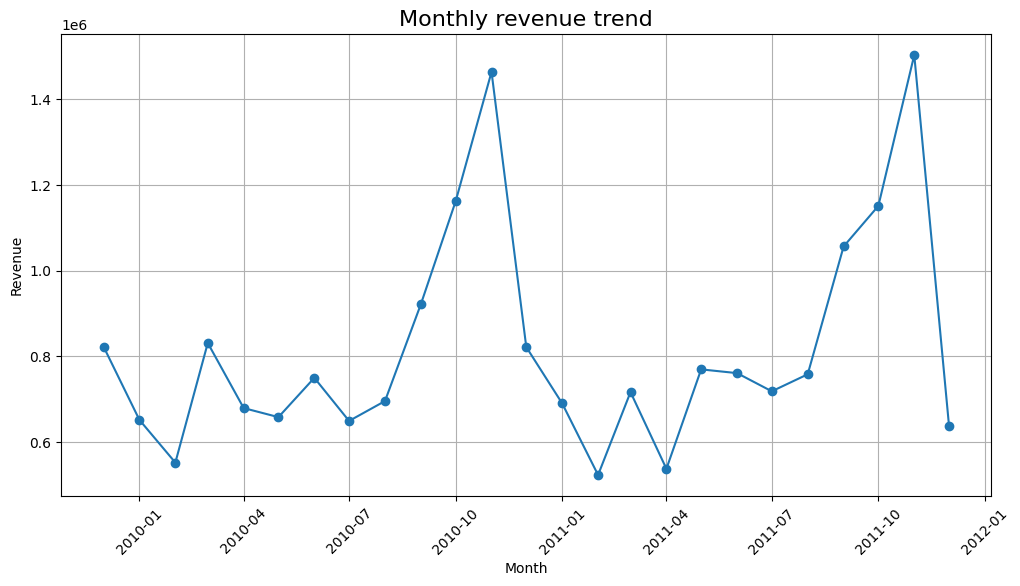

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_month'],monthly_sales['total_price'],marker='o')
plt.title("Monthly revenue trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

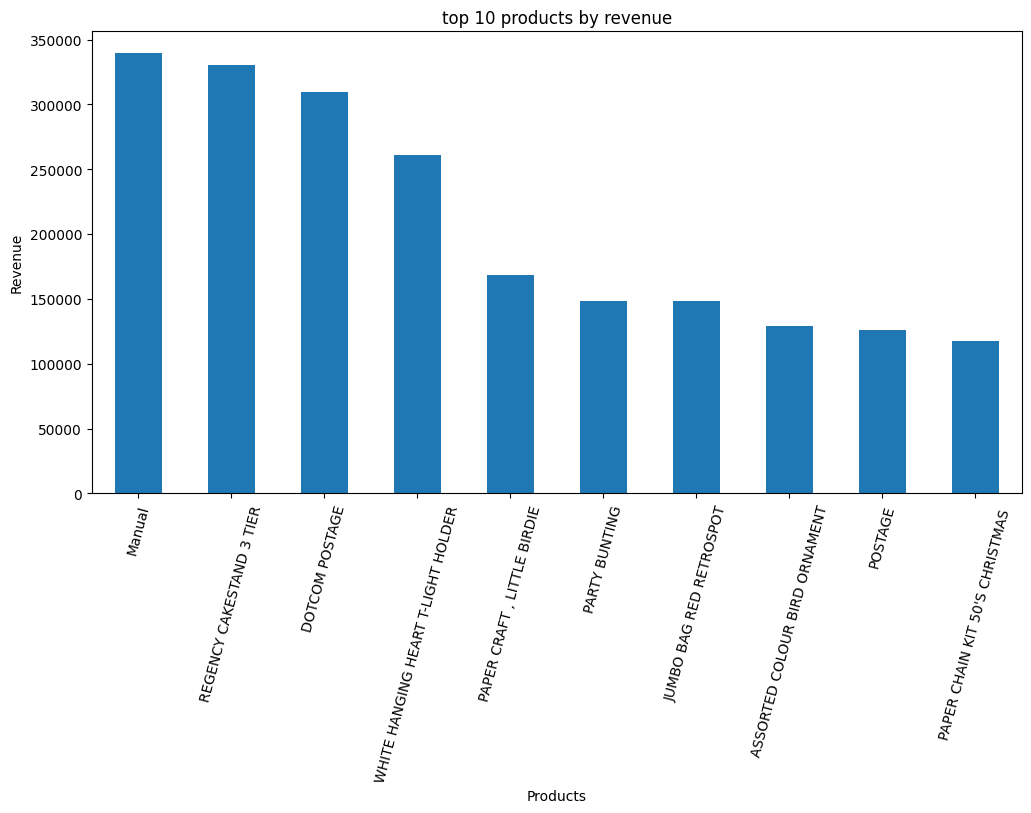

In [31]:
plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title("top 10 products by revenue")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.xticks(rotation=75)
plt.show()

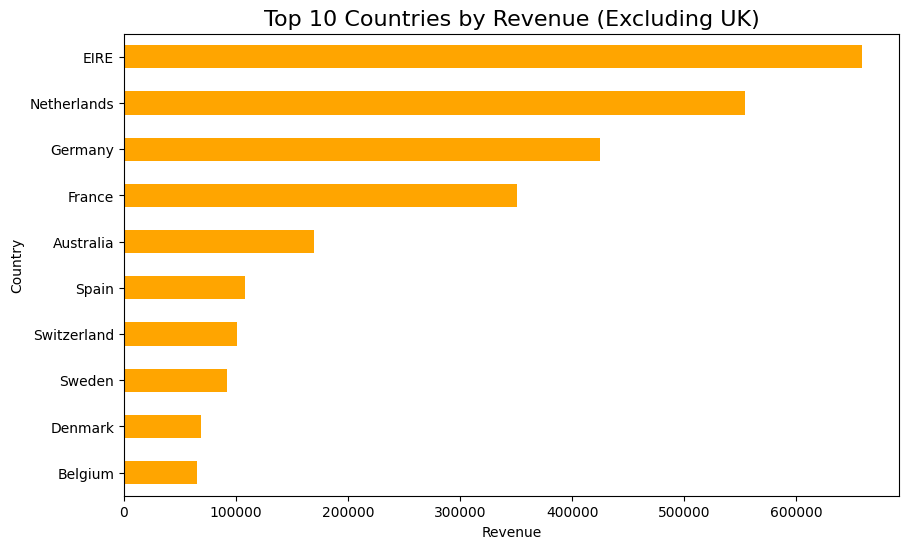

In [34]:
plt.figure(figsize=(10,6))
top_countries.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Countries by Revenue (Excluding UK)", fontsize=16)
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


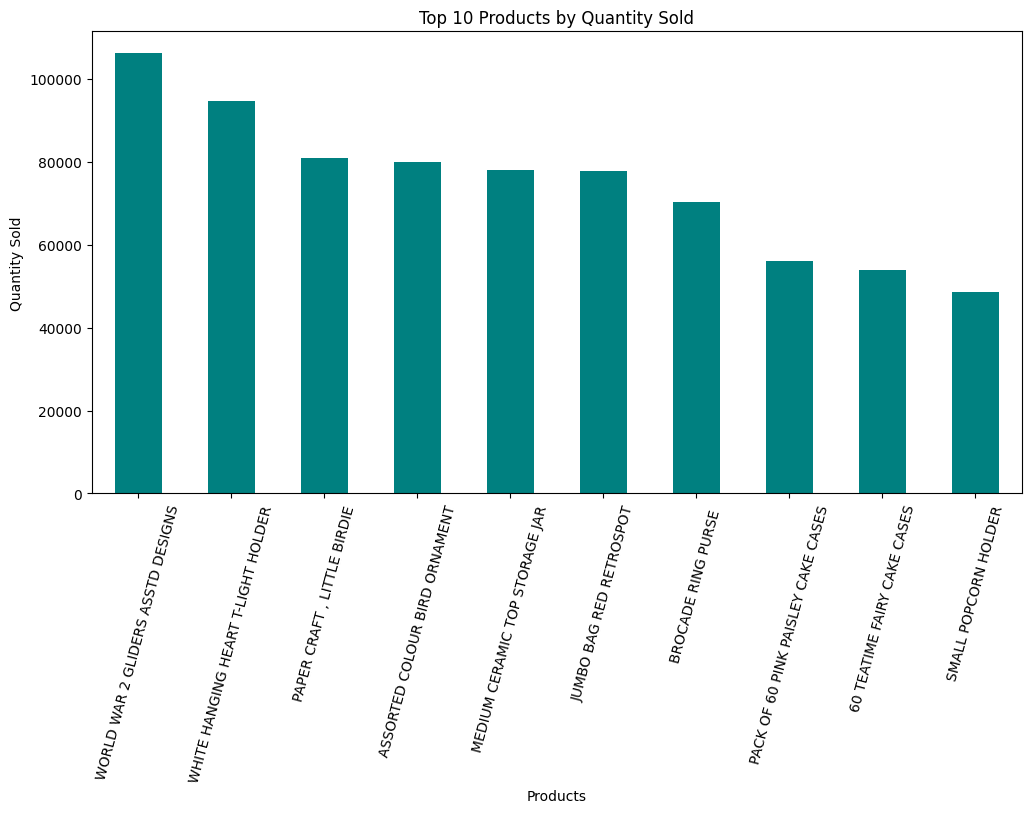

In [35]:
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_products_qty.plot(kind='bar', color='teal')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Products")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=75)
plt.show()

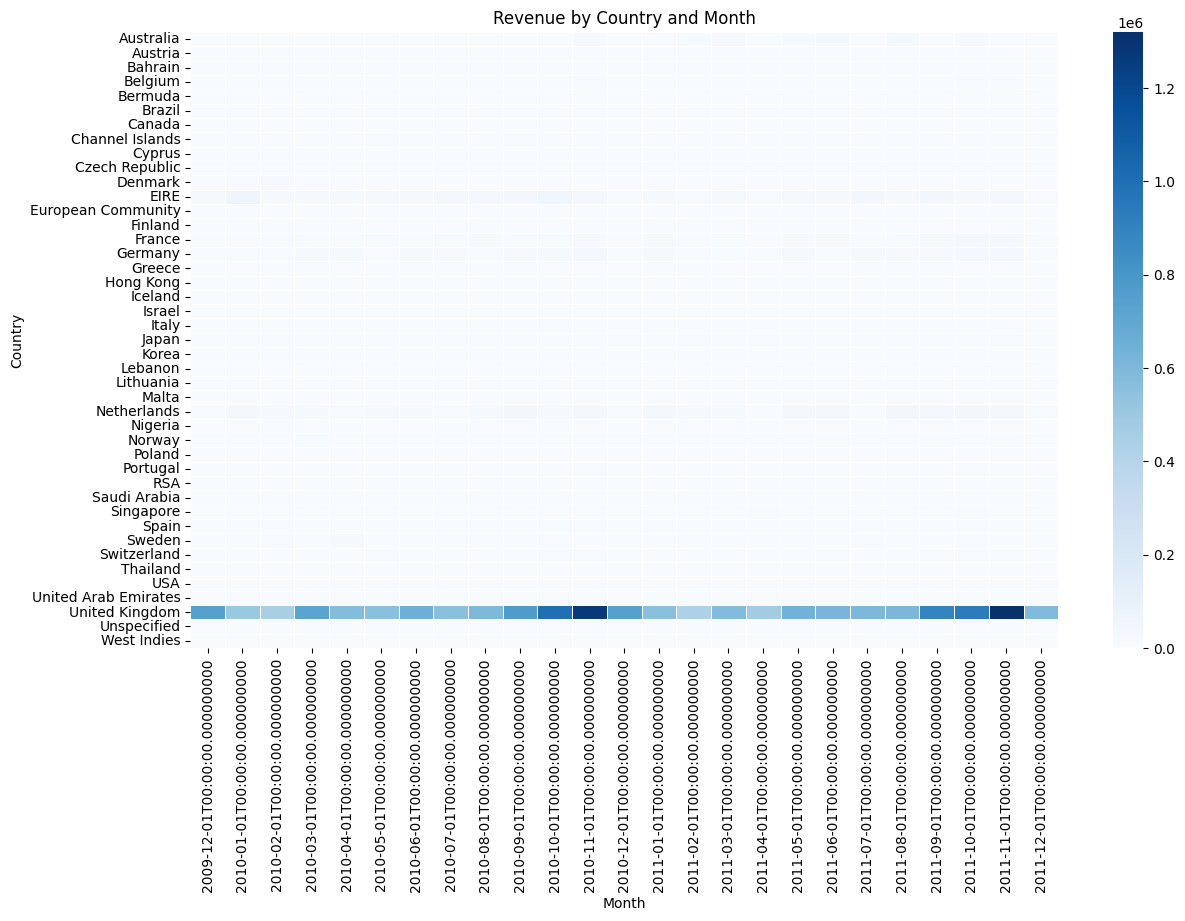

In [37]:
import seaborn as sns

country_month = df.groupby(['Country','order_month'])['total_price'].sum().reset_index()
pivot = country_month.pivot(index='Country', columns='order_month', values='total_price')

plt.figure(figsize=(14,8))
sns.heatmap(pivot.fillna(0), cmap="Blues", linewidths=0.5)
plt.title("Revenue by Country and Month")
plt.xlabel("Month")
plt.ylabel("Country")
plt.show()


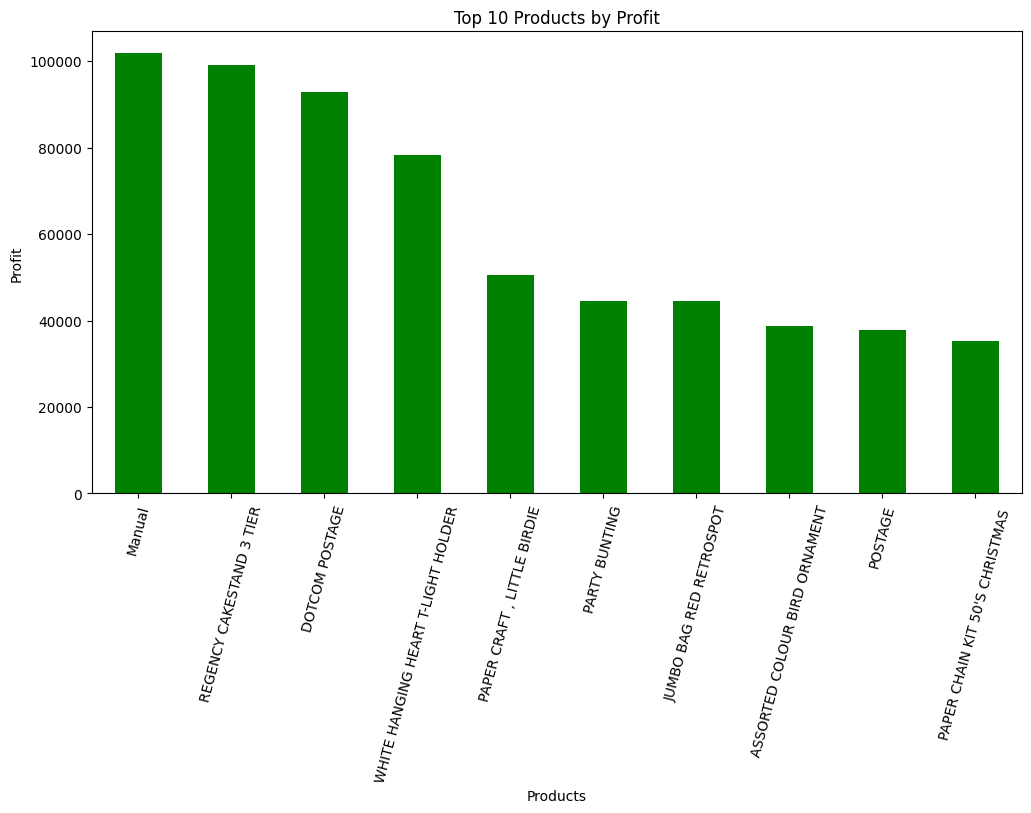

In [38]:
df['cost'] = df['Price'] * 0.7
df['profit'] = df['total_price'] - (df['Quantity'] * df['cost'])

profit_by_product = df.groupby('Description')['profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
profit_by_product.plot(kind='bar', color='green')
plt.title("Top 10 Products by Profit")
plt.xlabel("Products")
plt.ylabel("Profit")
plt.xticks(rotation=75)
plt.show()


In [40]:
# Calculate Top Products by Revenue
top_products_revenue = (
    df.groupby('Description')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Calculate Profit by Product (if you don't have 'Cost', just treat total_price as proxy for revenue)
profit_by_product = (
    df.groupby('Description')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Top Countries by Revenue (already done earlier, but redefine here to be safe)
top_countries = (
    df.groupby('Country')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


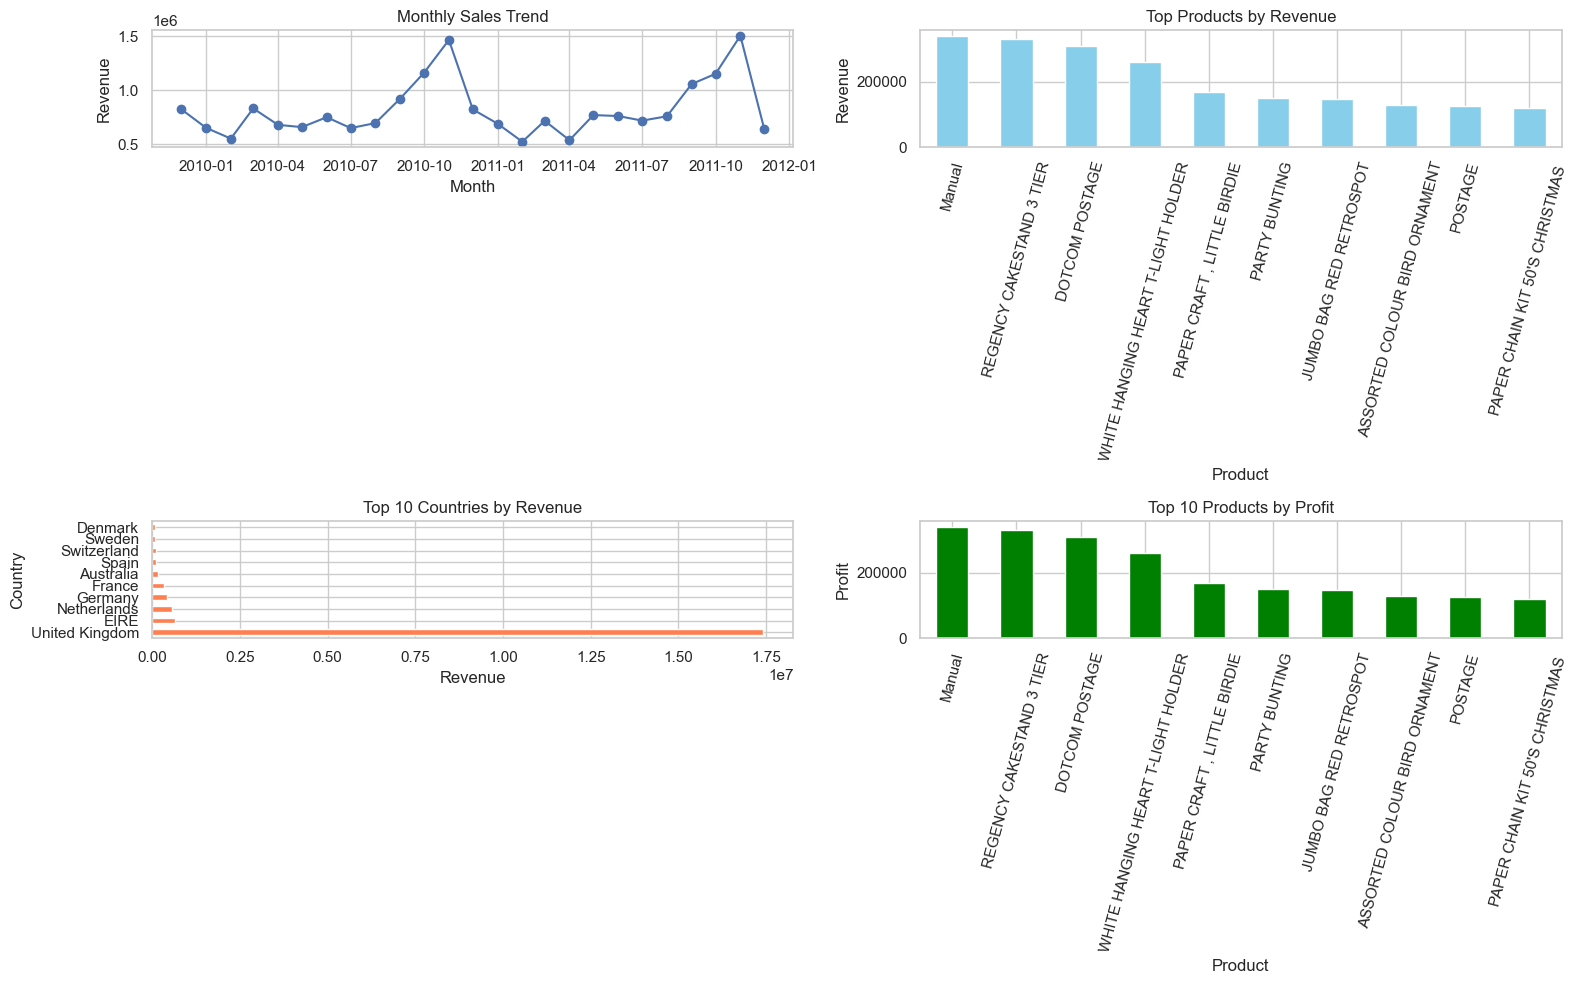

In [41]:
#static dashboard

import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Create a figure grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Sales Trend
axes[0,0].plot(monthly_sales['order_month'], monthly_sales['total_price'], marker='o')
axes[0,0].set_title("Monthly Sales Trend")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Revenue")

# 2. Top Products by Revenue
top_products_revenue.plot(kind='bar', ax=axes[0,1], color="skyblue")
axes[0,1].set_title("Top Products by Revenue")
axes[0,1].set_xlabel("Product")
axes[0,1].set_ylabel("Revenue")
axes[0,1].tick_params(axis='x', rotation=75)

# 3. Top 10 Countries by Revenue
top_countries.plot(kind='barh', ax=axes[1,0], color="coral")
axes[1,0].set_title("Top 10 Countries by Revenue")
axes[1,0].set_xlabel("Revenue")
axes[1,0].set_ylabel("Country")

# 4. Profit by Product
profit_by_product.plot(kind='bar', ax=axes[1,1], color="green")
axes[1,1].set_title("Top 10 Products by Profit")
axes[1,1].set_xlabel("Product")
axes[1,1].set_ylabel("Profit")
axes[1,1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()


In [44]:
pip install reportlab



   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --------------------- ------------------ 1.0/2.0 MB 6.3 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.0 MB/s eta 0:00:00


In [45]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("ecommerce_dashboard.pdf") as pdf:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Monthly Sales
    axes[0,0].plot(monthly_sales['order_month'], monthly_sales['total_price'], marker='o')
    axes[0,0].set_title("Monthly Sales Trend")

    # Top Products
    top_products_revenue.plot(kind='bar', ax=axes[0,1], color="skyblue")
    axes[0,1].set_title("Top Products by Revenue")

    # Top Countries
    top_countries.plot(kind='barh', ax=axes[1,0], color="coral")
    axes[1,0].set_title("Top Countries by Revenue")

    # Profit
    profit_by_product.plot(kind='bar', ax=axes[1,1], color="green")
    axes[1,1].set_title("Top Products by Profit")

    plt.tight_layout()
    pdf.savefig(fig)   # save this whole dashboard page into PDF
    plt.close()
